# Clustering

## Problem 1: Segment Customers

The problem that we are going to solve in this assignment is to segment customers into different groups based on their shopping trends.

In [1]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc


### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [2]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
display(shopping_data.head())


,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:

# TODO: retain only anual_income and spending_score for clustering

df = shopping_data.drop(['customer_id','genre','age'],1)

display(df.head())

<ipython-input-3-06172977e82c>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = shopping_data.drop(['customer_id','genre','age'],1)


,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.

**TODO: Use dendrogram to plot hierarchical clustering and find the number of clusters that makes sense.**

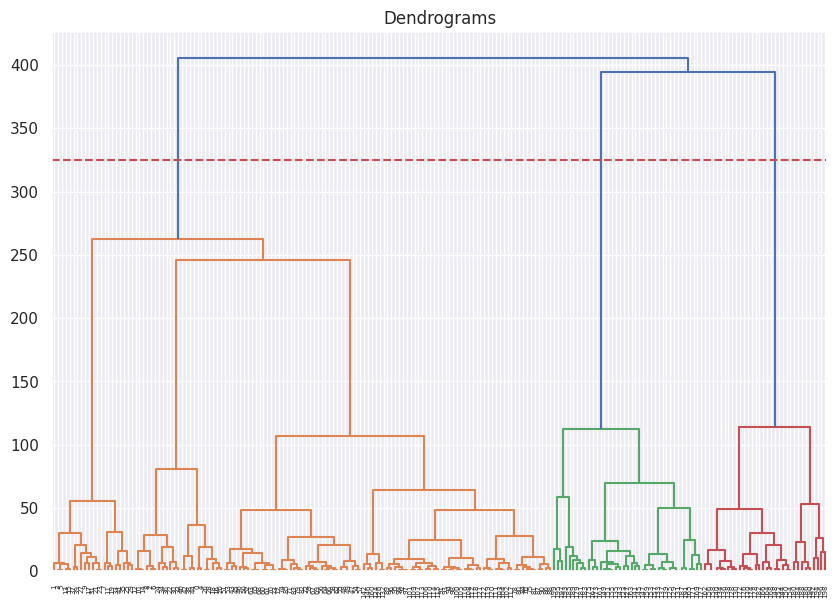

In [4]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=325, color='r', linestyle='--')             #plot a horizontal line that cuts the tallest vertical lines. this is the number of clusters.

**TODO: Apply hierarchical clustering based on the number of clusters you pick from the dendrogram, and visualize the results using scatterplot.**

Based on the dendrogram, I pick 3 clusters, but just for fun, I've produced scatterplots for K = 2 through 10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


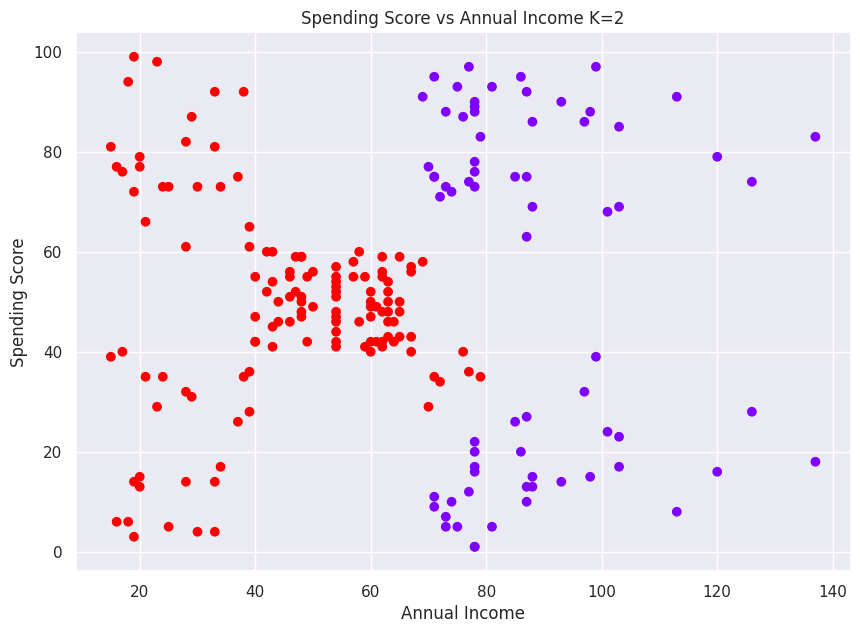

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


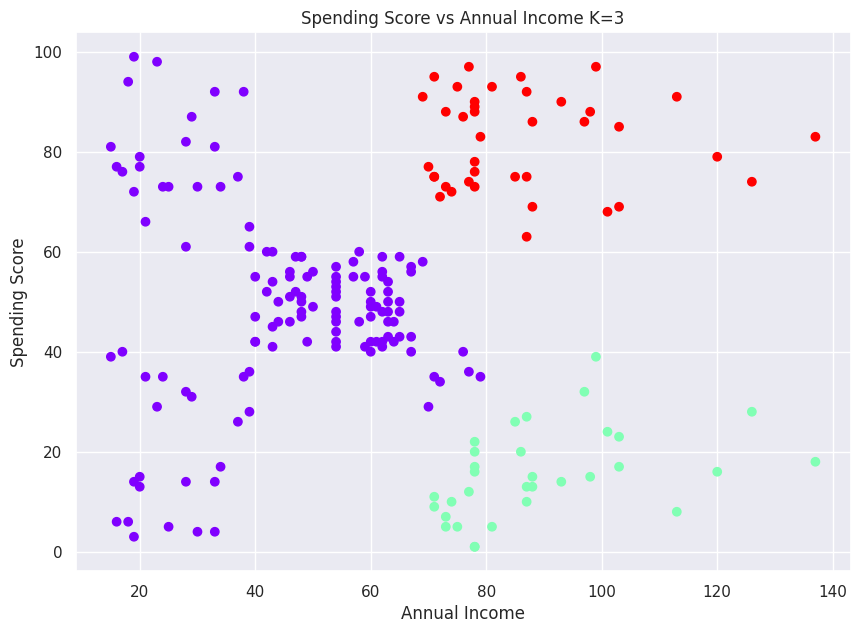

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


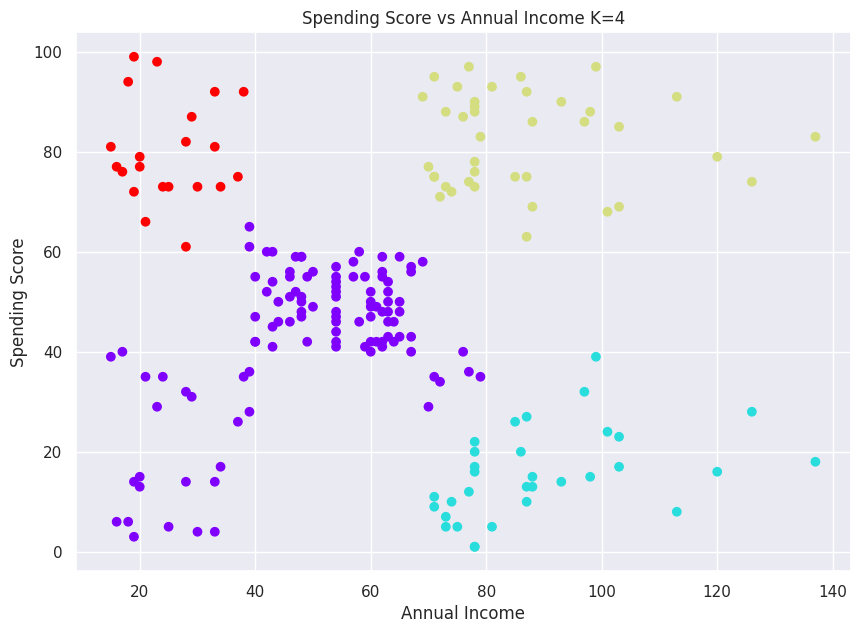

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


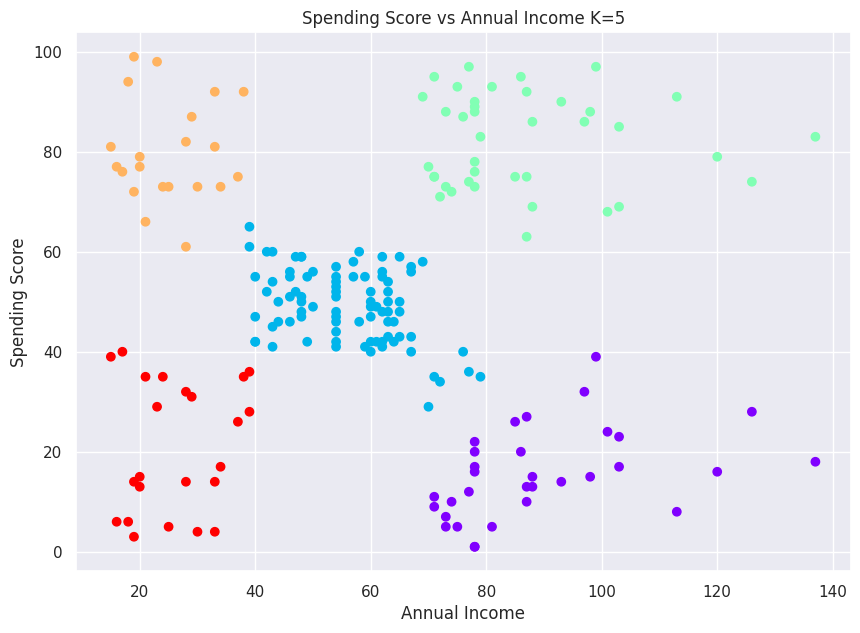

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


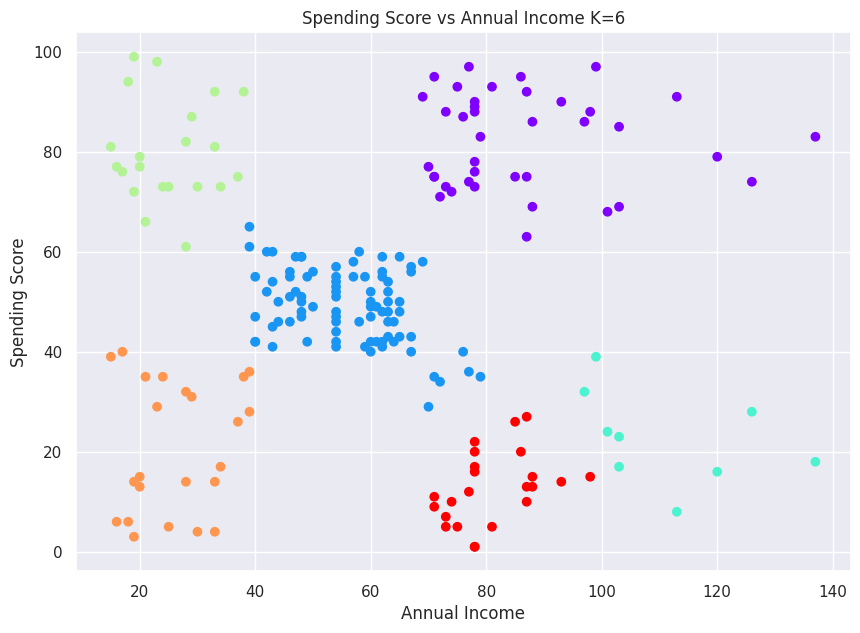

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


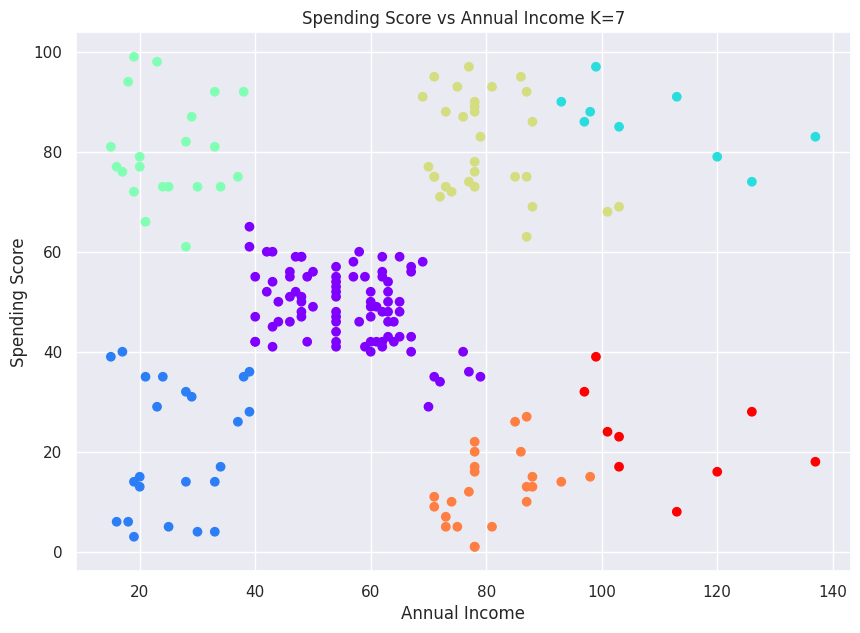

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


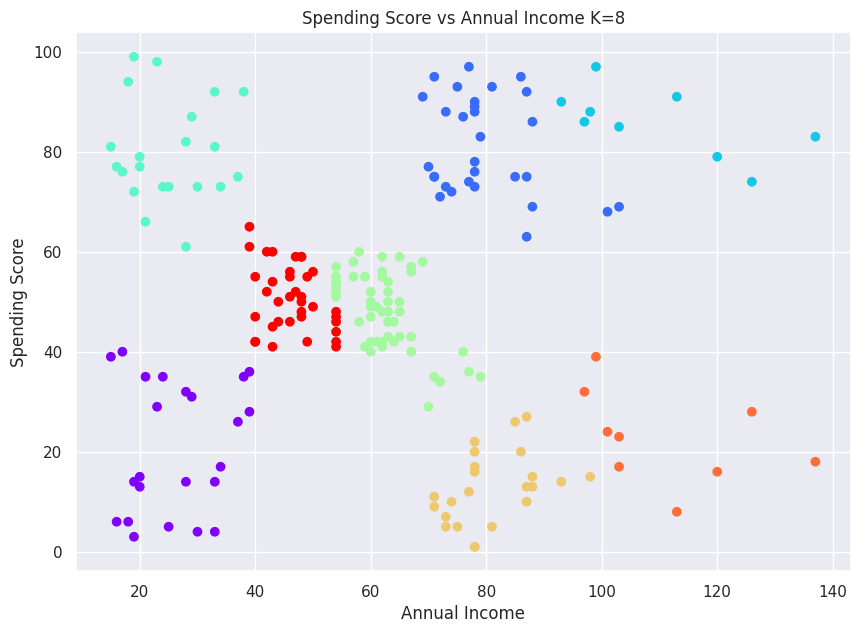

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


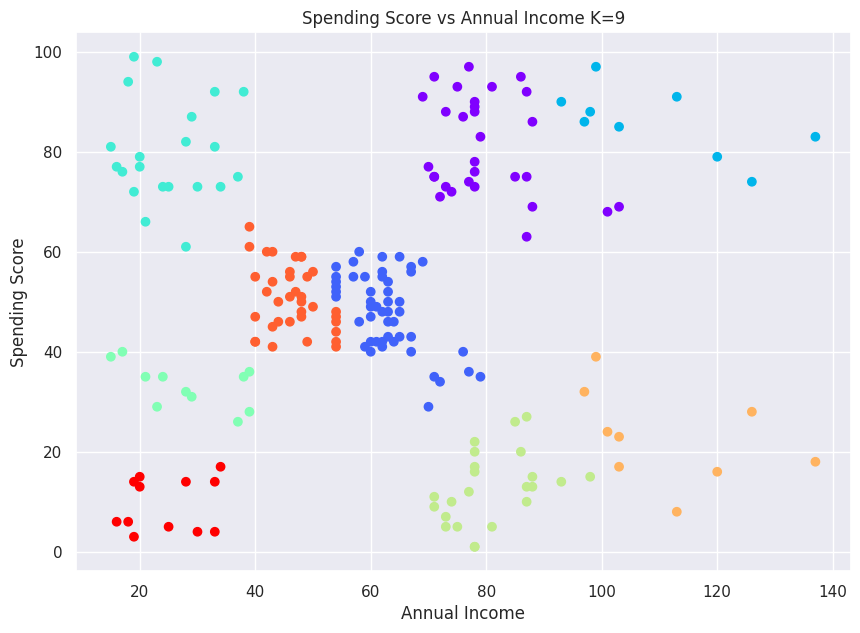

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


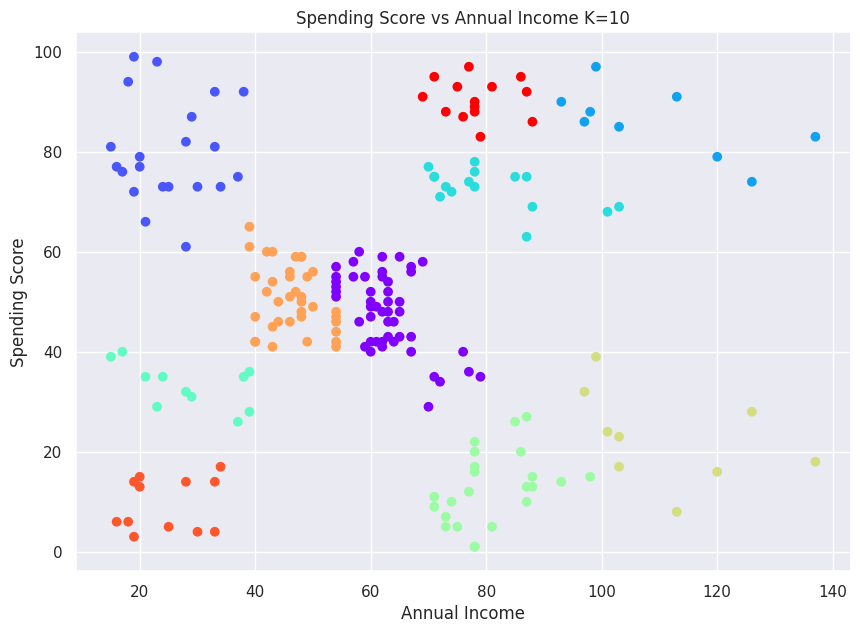

In [5]:
 K= [2,3,4,5,6,7,8,9,10]

 for i in K:  
  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
  cluster.fit_predict(df)


  plt.figure(figsize=(10, 7))  
  plt.scatter(df['annual_income'], df['spending_score'], c=cluster.labels_,cmap='rainbow')
  plt.title('Spending Score vs Annual Income K='+ str(i))
  plt.xlabel('Annual Income')
  plt.ylabel('Spending Score');
  plt.show()



### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**TODO: Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

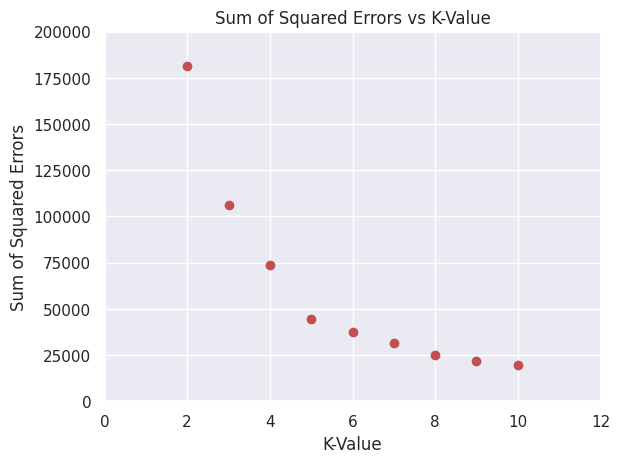

In [6]:
K= [2,3,4,5,6,7,8,9,10]
SSE = []

for i in K:
  kmeans = KMeans(i)
  kmeans.fit(df)
  identified_clusters = kmeans.fit_predict(df)
  error = [kmeans.inertia_] #returns the SSE value
  SSE.append(error)

SSET = np.array(SSE).T.tolist()

plt.scatter(K,SSET,c='r')
plt.title('Sum of Squared Errors vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Sum of Squared Errors')
plt.style.use('classic')
plt.show()

**TODO: Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot. *

The chosen K-Value is 5 based on the 'elbow method' but, just for fun, I've plotted the KMeans clusters for all K-values from 2 to 10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


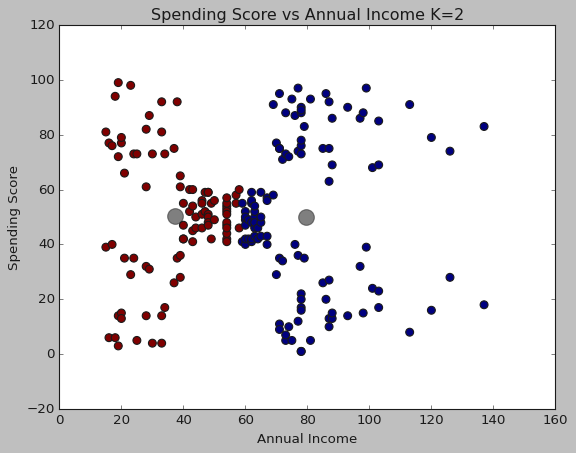

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


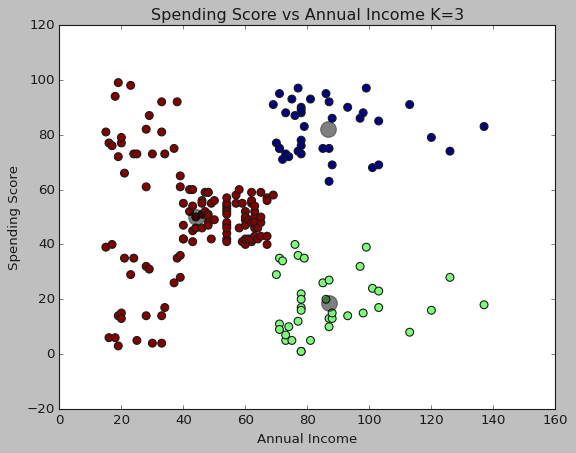

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


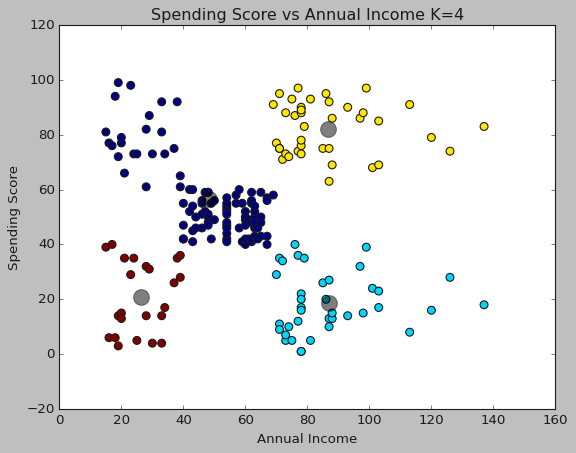

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


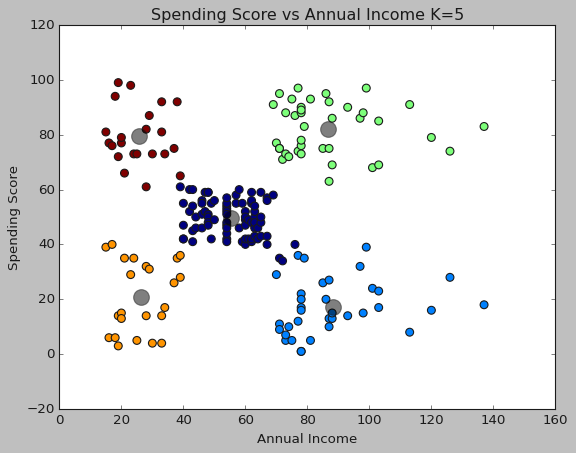

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


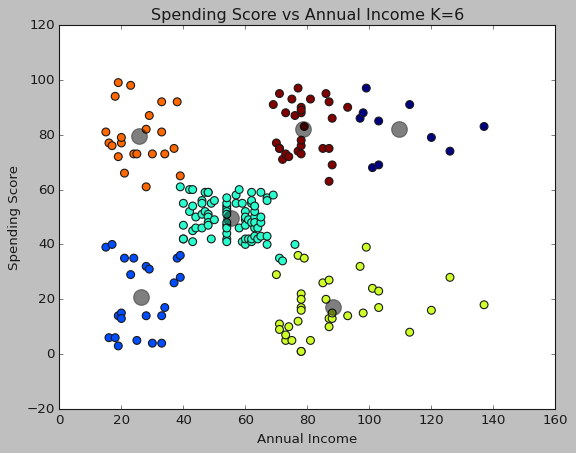

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


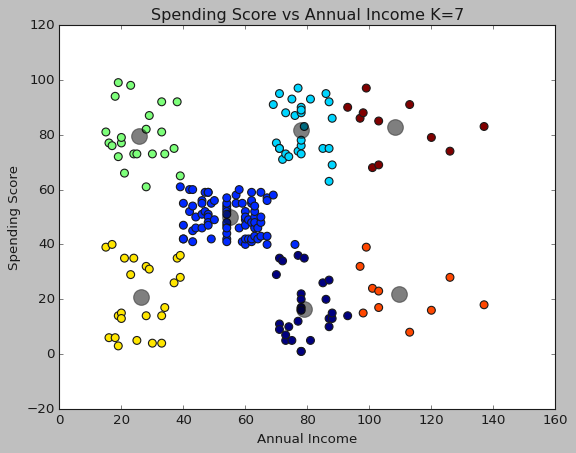

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


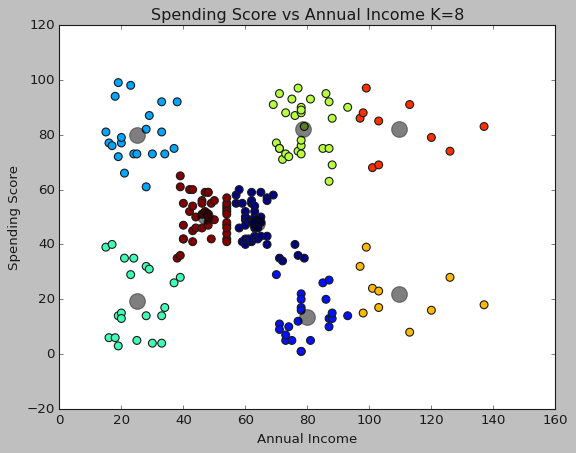

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


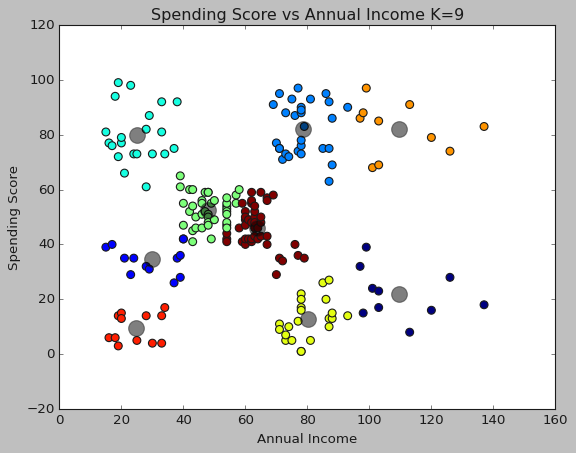

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


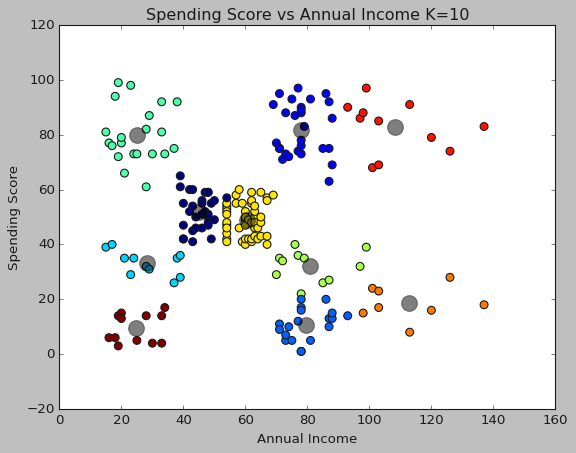

In [7]:
K= [2,3,4,5,6,7,8,9,10]

for i in K:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  identified_clusters = kmeans.fit_predict(df)

  plt.scatter(df['annual_income'], df['spending_score'], c=identified_clusters, s=50)
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
  plt.title('Spending Score vs Annual Income K='+ str(i))
  plt.xlabel('Annual Income')
  plt.ylabel('Spending Score');
  plt.show()

## Problem 2: Clustering (Manually)

For the following dataset, perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data
2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data
3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data
4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

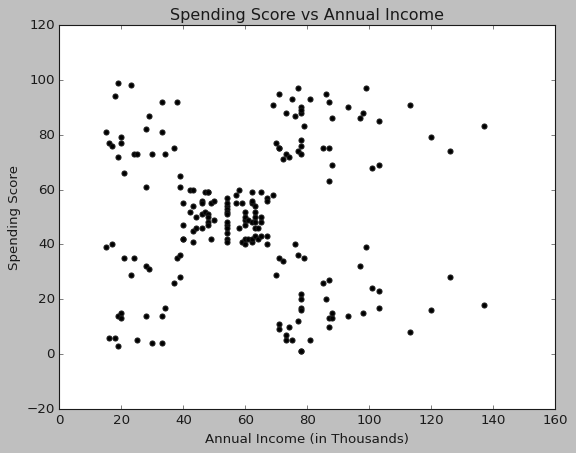

In [ ]:
X = df[["annual_income","spending_score"]]


#Visualise data points
plt.scatter(X["annual_income"],X["spending_score"],c='black')
plt.xlabel('Annual Income (in Thousands)')
plt.ylabel('Spending Score')
plt.title('Spending Score vs Annual Income')
plt.show()

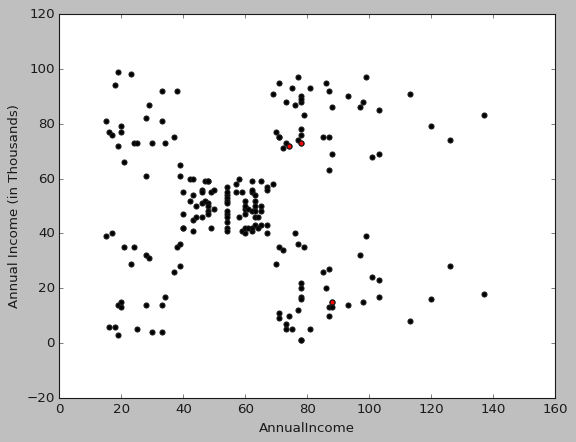

In [ ]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["annual_income"],X["spending_score"],c='black')
plt.scatter(Centroids["annual_income"],Centroids["spending_score"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Annual Income (in Thousands)')
plt.show()

In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["annual_income"]-row_d["annual_income"])**2
            d2=(row_c["spending_score"]-row_d["spending_score"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["spending_score","annual_income"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['spending_score'] - Centroids['spending_score']).sum() + (Centroids_new['annual_income'] - Centroids['annual_income']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["spending_score","annual_income"]]


-6.96917002845796
2.500556117794769
5.359299975418569
2.5214163457424057
0.0


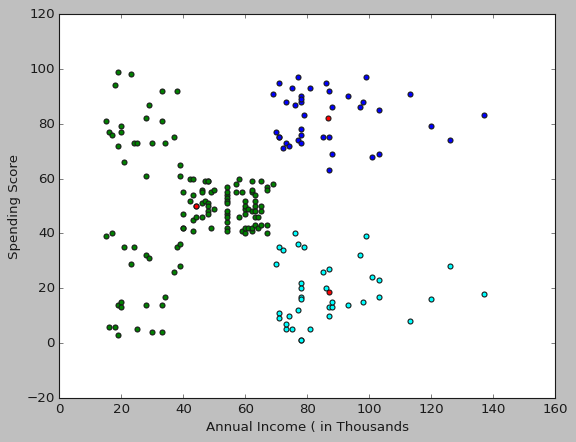

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["annual_income"],data["spending_score"],c=color[k])
plt.scatter(Centroids["annual_income"],Centroids["spending_score"],c='red')
plt.xlabel('Annual Income ( in Thousands)')
plt.ylabel('Spending Score')
plt.show()

## Bonus points
Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. You can use paper title or abstract to build your features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

1. Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

2. Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

In [ ]:
# Load the Relevant libraries
import sklearn as sk

# URL for the AAAI (UW Repository)
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")

# TODO